# Relatório de Análise VII

## Criando Agrupamentos

In [68]:
import pandas as pd

In [69]:
dados = pd.read_csv("dados/aluguel_residencial.csv", sep = ";")

In [70]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [71]:
# Calculando a média da coluna "Valor"

dados["Valor"].mean()

5046.172821405663

In [72]:
# Criando lista de bairros para fazer uma analise simplificada

bairros = ["Barra da Tijuca", "Copacabana", "Ipanema", "Leblon"]
selecao = dados["Bairro"].isin(bairros)
dados = dados[selecao]

In [73]:
# Confirmando quais bairros permaneceram dentro da base

dados["Bairro"].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
19            Ipanema
27             Leblon
Name: Bairro, dtype: object

In [74]:
# Criando grupo a partir dos bairros

grupo_bairro = dados.groupby("Bairro")

In [75]:
# Criando um laço para agrupar os bairros
# e calcular a média de valores dentro da tabela de dados

for bairro, valores in grupo_bairro:
    print("{} -> {}".format(bairro, valores.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Copacabana -> 4126.677004538578
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874


In [76]:
grupo_bairro[["Valor", "Condominio"]].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Copacabana,4126.68,1148.68
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18


In [77]:
# Método "describe" faz uma breve descrição dos dados
# mostrando os principais dados estatísticos referente a uma serie

grupo_bairro["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0


In [78]:
# Método "aggregate" permite criar as descrições 
# de acordo com a necesidade e relevância


grupo_bairro["Valor"].aggregate(["min", "max", "sum"])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Copacabana,100.0,35000.0,10910934.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0


In [79]:
# importando matplotlib para poder fazer análises gráficas 
# dos dados. 

# Dentro do jupyter é necessário iniciar a importação com a
# linha "% matplotlib inline", para que as informações apareçam

# A linha "plt.rc" configura o tamanho da figura na hora de apresentar
# o gráfico

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

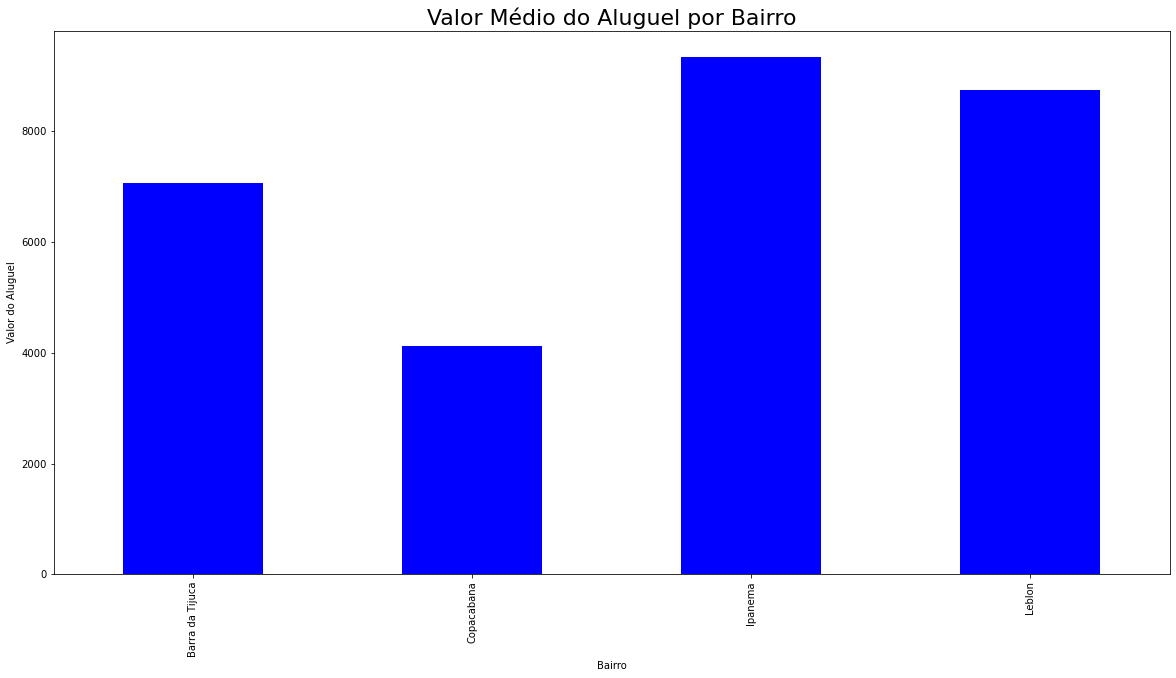

In [80]:
fig = grupo_bairro["Valor"].mean().plot.bar(color = "blue")

fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {'fontsize':22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

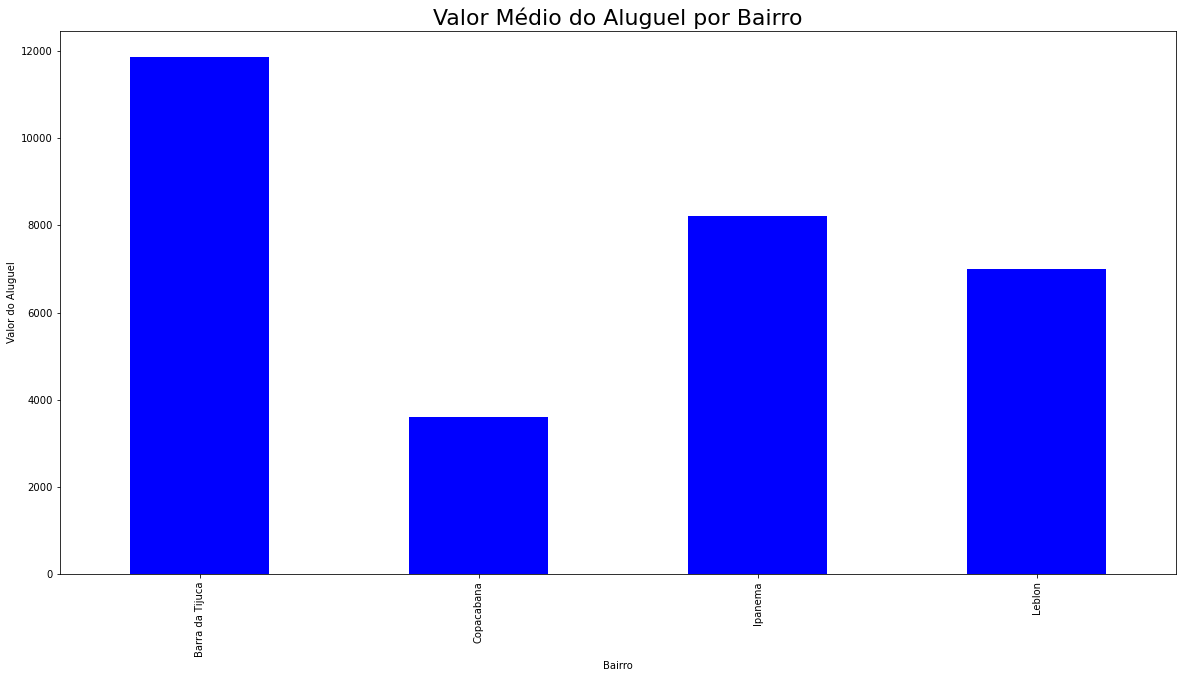

In [82]:
fig = grupo_bairro["Valor"].std().plot.bar(color = "blue")

fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {'fontsize':22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

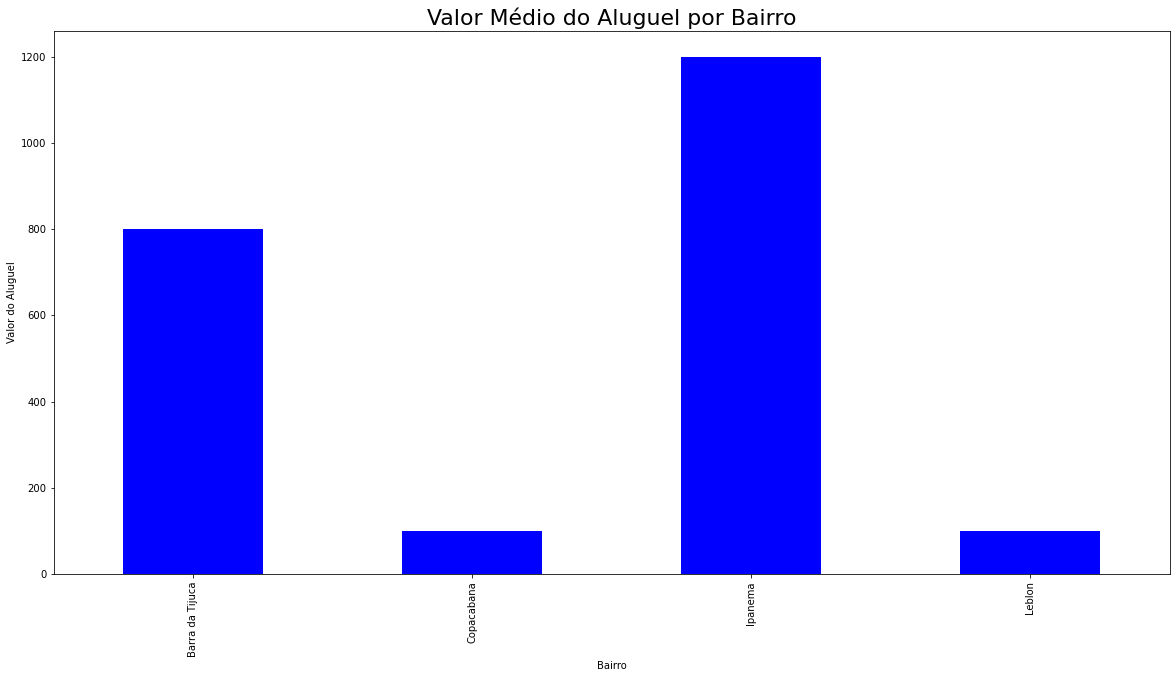

In [83]:
fig = grupo_bairro["Valor"].min().plot.bar(color = "blue")

fig.set_ylabel("Valor do Aluguel")
fig.set_title("Valor Médio do Aluguel por Bairro", {'fontsize':22})

## Exercícios

In [84]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [85]:
produtos = precos.groupby('Produto', sort = False)
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [87]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Cebola,2.060000,0.409512,1.69,2.5
Tomate,3.426667,0.518684,2.99,4.0
Batata,3.960000,0.256320,3.69,4.2


## Criando Faixas de Valor